## Taxi Churn [mini project]

###### The task:
* Perform a brief Exploratory Data Analysis
* Define Churn
* Perfrom A/B tests:
  - Difference in churn on various platforms;
  - Dfference in churn in different cities;
  - Diffrence in acitvity of drivers during the first 30 days after registration in different cities;
  - Does acitvity of drivers during the first 30 days after registration influence churn.

**Importing libraries**

In [85]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, chi2, mannwhitneyu, shapiro, kruskal
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

### 1. Brief EDA

**Importing dataset from a zipped csv-file in the working directory**

In [86]:
df = pd.read_csv('churn.zip', compression='zip')

df

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0          3.67                   5.0                   4.7       1.10   
1          8.26                   5.0                   5.0       1.00   
2          0.77                   5.0                   4.3       1.00   
3          2.36                   4.9                   4.6       1.14   
4          3.13                   4.9                   4.4       1.19   
...         ...                   ...                   ...        ...   
49995      5.63                   4.2                   5.0       1.00   
49996      0.00                   4.0                   NaN       1.00   
49997      3.86                   5.0                   5.0       1.00   
49998      4.58                   3.5                   3.0       1.00   
49999      3.49                   5.0                   NaN       1.00   

                 city last_trip_date    phone signup_date  surge_pct  \
0      King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1             Astapor     2014-05-05  Android  2014-01-29        0.0   
2             Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3      King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4          Winterfell     2014-03-15  Android  2014-01-27       11.8   
...               ...            ...      ...         ...        ...   
49995  King's Landing     2014-06-05   iPhone  2014-01-25        0.0   
49996         Astapor     2014-01-25   iPhone  2014-01-24        0.0   
49997      Winterfell     2014-05-22  Android  2014-01-31        0.0   
49998         Astapor     2014-01-15   iPhone  2014-01-14        0.0   
49999         Astapor     2014-04-20  Android  2014-01-18        0.0   

       trips_in_first_30_days  luxury_car_user  weekday_pct  
0                           4             True         46.2  
1                           0            False         50.0  
2                           3            False        100.0  
3                           9             True         80.0  
4                          14            False         82.4  
...                       ...              ...          ...  
49995                       0            False        100.0  
49996                       1            False          0.0  
49997                       0             True        100.0  
49998                       2            False        100.0  
49999                       0            False          0.0  

[50000 rows x 12 columns]

**Getting columns names**

In [87]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct'],
      dtype='object')

**Columns description:**
* city 
* phone – platform (iPhone / Android)
* signup_date – registration date (YYYYMMDD)
* last_trip_date – last trip date (YYYYMMDD)
* avg_dist – one ride average distance during the first 30 days after registrations, miles
* avg_rating_by_driver 
* avg_rating_of_driver
* surge_pct – percentage of trips in busy traffic
* avg_surge – average percentage of trips in busy traffic
* trips_in_first_30_days – rides in the first 30 days after registration
* luxury_car_user – TRUE/FALSE
* weekday_pct – percentage of trips in weekdays

**Checking missing values**

In [88]:
df.isna().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

**Number of unique values**

In [89]:
df.nunique()

avg_dist                  2908
avg_rating_by_driver        27
avg_rating_of_driver        37
avg_surge                  115
city                         3
last_trip_date             182
phone                        2
signup_date                 31
surge_pct                  367
trips_in_first_30_days      59
luxury_car_user              2
weekday_pct                666
dtype: int64

**Checking columns datatypes**

In [90]:
df.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
luxury_car_user              bool
weekday_pct               float64
dtype: object

**Converting 'last_trip_date' and 'signup_date' into datetime**

In [91]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

**Checking the results of conversion**

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                50000 non-null  float64       
 1   avg_rating_by_driver    49799 non-null  float64       
 2   avg_rating_of_driver    41878 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   city                    50000 non-null  object        
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   signup_date             50000 non-null  datetime64[ns]
 8   surge_pct               50000 non-null  float64       
 9   trips_in_first_30_days  50000 non-null  int64         
 10  luxury_car_user         50000 non-null  bool          
 11  weekday_pct             50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

**Descriptive statistics**

In [93]:
df.describe()

avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  50000.000000          49799.000000          41878.000000  50000.000000   
mean       5.796827              4.778158              4.601559      1.074764   
std        5.707357              0.446652              0.617338      0.222336   
min        0.000000              1.000000              1.000000      1.000000   
25%        2.420000              4.700000              4.300000      1.000000   
50%        3.880000              5.000000              4.900000      1.000000   
75%        6.940000              5.000000              5.000000      1.050000   
max      160.960000              5.000000              5.000000      8.000000   

          surge_pct  trips_in_first_30_days   weekday_pct  
count  50000.000000            50000.000000  50000.000000  
mean       8.849536                2.278200     60.926084  
std       19.958811                3.792684     37.081503  
min        0.000000                0.000000      0.000000  
25%        0.000000                0.000000     33.300000  
50%        0.000000                1.000000     66.700000  
75%        8.600000                3.000000    100.000000  
max      100.000000              125.000000    100.000000

**Discriptive statistics for nominative data**

In [94]:
df.describe(include='object')

city   phone
count        50000   49604
unique           3       2
top     Winterfell  iPhone
freq         23336   34582

**Discriptive statistics for datetime**

In [95]:
df.describe(include='datetime')

/home/nktnlx/yes/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

/home/nktnlx/yes/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



last_trip_date          signup_date
count                 50000                50000
unique                  182                   31
top     2014-06-29 00:00:00  2014-01-18 00:00:00
freq                   2036                 2948
first   2014-01-01 00:00:00  2014-01-01 00:00:00
last    2014-07-01 00:00:00  2014-01-31 00:00:00

### 2. Creating Churn metrics

Let's assume that a driver stopped using our service if she/he was inactive for 31 days and more.

In [96]:
# creating a new column with a period of being inactive
df['days_since_last_trip'] = df.last_trip_date.max() - df.last_trip_date

df['days_since_last_trip']

0        14 days
1        57 days
2       175 days
3         2 days
4       108 days
          ...   
49995    26 days
49996   157 days
49997    40 days
49998   167 days
49999    72 days
Name: days_since_last_trip, Length: 50000, dtype: timedelta64[ns]

In [97]:
# converting to int
df['days_since_last_trip'] = df['days_since_last_trip'].dt.days

In [98]:
df['days_since_last_trip']

0         14
1         57
2        175
3          2
4        108
        ... 
49995     26
49996    157
49997     40
49998    167
49999     72
Name: days_since_last_trip, Length: 50000, dtype: int64

In [99]:
# creating churn column
df['churn'] = df.days_since_last_trip.apply(lambda x: 'churn' if x > 30 else 'not_churn')
df[['days_since_last_trip', 'churn']]

days_since_last_trip      churn
0                        14  not_churn
1                        57      churn
2                       175      churn
3                         2  not_churn
4                       108      churn
...                     ...        ...
49995                    26  not_churn
49996                   157      churn
49997                    40      churn
49998                   167      churn
49999                    72      churn

[50000 rows x 2 columns]

**Checking churn rate**

In [100]:
df.churn.value_counts(normalize=True).mul(100)

churn        62.392
not_churn    37.608
Name: churn, dtype: float64

**Plotting churn (absolute values)**

In [101]:
fig = px.histogram(df, x='churn')
fig.show()

<img src='churn_abs.png'>

**Plotting churn rate (percentage)**

In [102]:
fig = px.histogram(df, x='churn', histnorm='probability density')
fig.show()

<img src='churn_pct.png'>

### Perfroming A/B tests

####  Difference in churn on various platforms

**Computing a simple cross tabulation of two (or more) factors**

In [103]:
pd.crosstab(df.churn, df.phone)

phone      Android  iPhone
churn                     
churn        11876   19057
not_churn     3146   15525

**Graphing Churn VS Platform cross tabulation results**

In [104]:
fig = px.histogram(df[['churn', 'phone']].dropna(), x='churn', color='phone')
fig.show()

<img src='churn_platform.png'>

**Formulating hypothesis:**
* $H_0$: there is no relation between Churn and Platform
* $H_1$: there is a relation between Churn and Platform

In [105]:
# We'll use Chi-squared test
stat, p, dof, expected = chi2_contingency(pd.crosstab(df.churn, df.phone))

In [106]:
stat, p  # chi-square and p-value

(2558.394212267425, 0.0)

In [107]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Rejecting H0')
else:
    print('Not rejecting H0')

Rejecting H0


In [108]:
prob = 0.95
alpha = 1 - prob
if p <= alpha:
    print('Rejecting H0')
else:
    print('Not rejecting H0')

Rejecting H0


#### Churn difference in different cities

**Computing a simple cross tabulation of two (or more) factors**

In [109]:
pd.crosstab(df.churn, df.city)

city       Astapor  King's Landing  Winterfell
churn                                         
churn        12306            3767       15123
not_churn     4228            6363        8213

**Graphing Churn rate VS City cross tabulation results**

In [110]:
fig = px.histogram(df[['churn', 'city']].dropna(), x='churn', color='city', histnorm='probability density')
fig.show()

<img src='churn_city.png'>

**Formulating hypothesis:**
* $H_0$: there is no relation between Churn and City
* $H_1$: there is a relation between Churn and City

In [111]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df.churn, df.city))

In [112]:
stat, p

(3821.5510225559633, 0.0)

In [113]:
prob = 0.95
critical = chi2.ppf(prob, dof)

if abs(stat) >= critical:
    print('Rejecting H0')
else:
    print('Not rejecting H0')

Rejecting H0


In [114]:
prob = 0.95
alpha = 1 - prob
if p <= alpha:
    print('Rejecting H0')
else:
    print('Not rejecting H0')

Rejecting H0


#### Diffrence in acitvity of drivers during the first 30 days after registration in different cities

**Formulating hypothesis:**
* $H_0$: there is no relation between drivers acitivity in the first 30 days and City
* $H_1$: there is a relation between drivers acitivity in the first 30 days and City

**Checking distribution for normality (Shapiro-Wilk test)**

In [115]:
res = shapiro(df['trips_in_first_30_days'].sample(1000, random_state=17))

if res[1] < alpha:
    print('The null hypothesis that the data was drawn from a normal distribution is rejected!')
else:
    print('The distribution of the data is similar to normal distribution.')

The null hypothesis that the data was drawn from a normal distribution is rejected!


**Graphing the distribution**

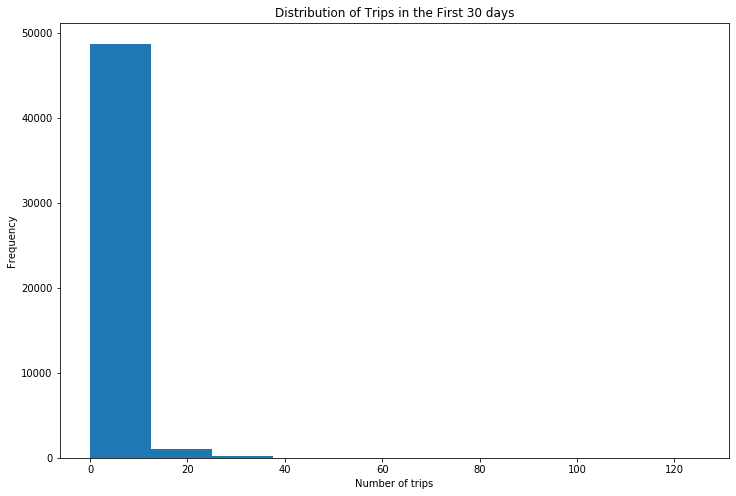

In [116]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Trips in the First 30 days')
plt.xlabel('Number of trips')
df.trips_in_first_30_days.plot(kind='hist');

The distribution is not normal, so we'll use a nonparametric analogue of ANOVA - the Kruskal-Wallis test.

In [117]:
# Kruskal-Wallis test
result = sp.posthoc_dunn(a=df, val_col='trips_in_first_30_days', group_col='city')
result

Astapor  King's Landing    Winterfell
Astapor         1.000000e+00    1.313616e-09  8.161670e-50
King's Landing  1.313616e-09    1.000000e+00  4.220106e-10
Winterfell      8.161670e-50    4.220106e-10  1.000000e+00

We have discovered statistically significant difference between all the cities (H0 was rejected). 

#### Does acitvity of drivers during the first 30 days after registration influence churn.

**Formulating hypothesis:**
* $H_0$: there is no relation between drivers acitivity in the first 30 days and churn
* $H_1$: there is a relation between drivers acitivity in the first 30 days and churn

**Running Mann-Whitney U non-pararmetric test**

In [118]:
result = mannwhitneyu(df[df['churn'] == 'not_churn'].trips_in_first_30_days,
           df[df['churn'] == 'churn'].trips_in_first_30_days)

if result.pvalue < alpha:
    print('We can reject H0')
else:
    print('We have to accept H0.')

We can reject H0


In [119]:
df.groupby('churn').agg({'trips_in_first_30_days': 'sum'})

trips_in_first_30_days
churn                            
churn                       51738
not_churn                   62172

The distribution of the drivers acitivity in the first 30 days variable is not normal, so we used the Mann-Whitney rank test to test the hypothesis. The result was statistically significant. This means that there is a statistically significant difference, the users who left our service (churn) were less active.